In [1]:
import os
import pandas as pd
import plotly.express as px
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Preco'] = data.target * 100000
fig = px.scatter_3d(
    df.sample(1000),  # <-- Amostra de 1000 pontos (em vez de todos)
    x='MedInc',
    y='HouseAge',
    z='Preco',
    color='AveRooms',
    hover_data=['AveBedrms']  # Mantém só dados essenciais
)
fig.write_html(
    "../assets/3d_imoveis.html",
    include_plotlyjs='cdn',
    full_html=False,
    config={'displayModeBar': False},  # Remove botões desnecessários
    default_width='100%',
    default_height='90vh'
)

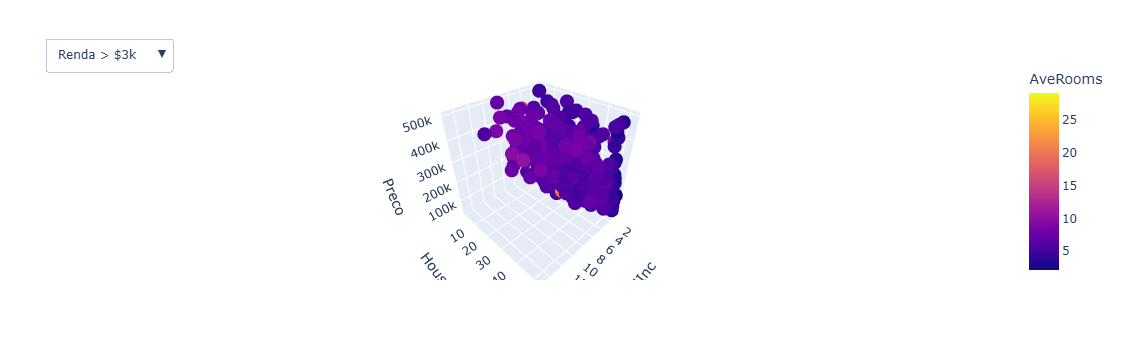

In [2]:
# Filtros por Renda
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [{"visible": [df['MedInc'] >= renda]}],  # <--- Filtro dinâmico
                    "label": f"Renda > ${renda}k",
                    "method": "restyle"
                }
                for renda in [3, 5, 10]  # Valores de filtro
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.1,
            "y": 1.1  # Posição do botão
        }
    ]
)

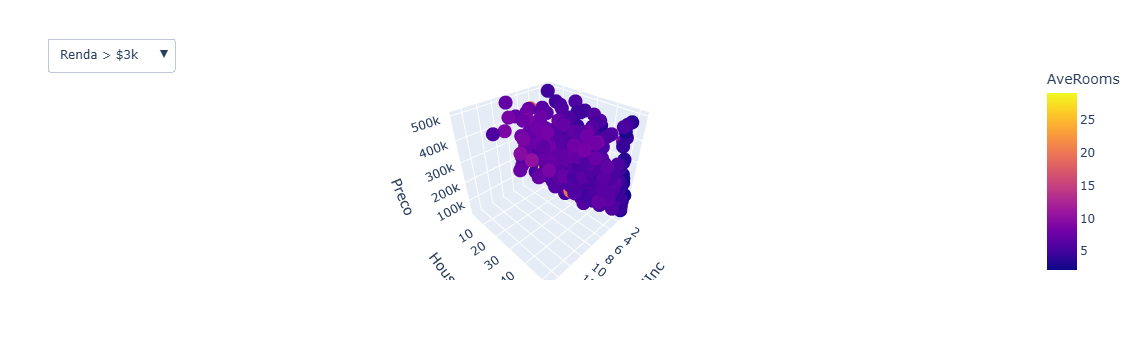

In [3]:
# Modifique o gráfico 3D para mostrar mais dados
fig.update_traces(
    hovertemplate="<b>Preço:</b> $%{z:,.2f}<br>" +  # <--- Formatação de números
                  "<b>Renda:</b> %{x}K/ano<br>" +
                  "<b>Idade da Casa:</b> %{y} anos" +
                  "<extra></extra>"  # Remove info extra
)

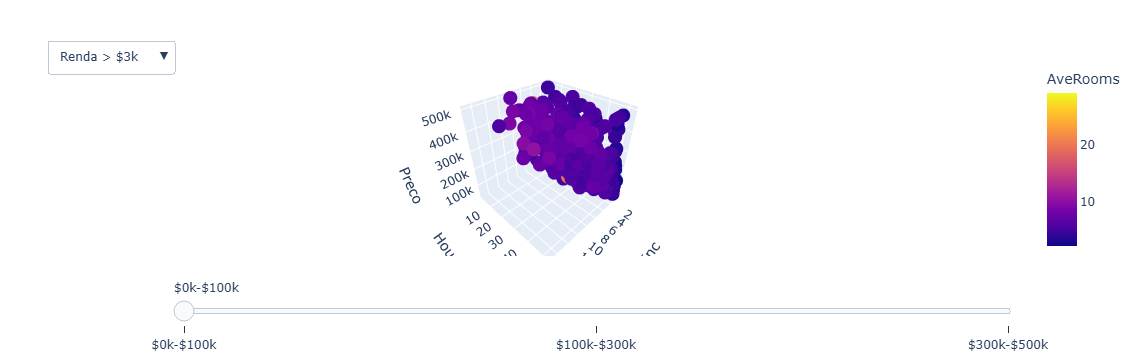

In [4]:
# Adicione esta célula após criar o gráfico
fig.update_layout(
    sliders=[{
        "steps": [
            {
                "args": [{"z": [df['Preco'].between(min_price, max_price)]}],
                "label": f"${min_price}k-${max_price}k",
                "method": "restyle"
            }
            for min_price, max_price in [(0,100), (100,300), (300,500)]
        ],
        "x": 0.1,
        "len": 0.9
    }]
)